<a href="https://colab.research.google.com/github/HongSeongMo/Airbnb/blob/main/Copy_of_Copy_of_airbnb_lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5강. 매출예측 모델 학습: 선형회귀와 의사결정 나무

학습 데이터 읽기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
path = 'drive/MyDrive/letuin/airbnb/data'

X_train = pd.read_csv(f'{path}/x_train.csv')
y_train = pd.read_csv(f'{path}/y_train.csv')

In [4]:
X_train.columns

Index(['accommodates', 'availability_365', 'calculated_host_listings_count',
       'minimum_maximum_nights', 'latitude', 'number_of_reviews',
       'maximum_minimum_nights', 'review_scores_value',
       'review_scores_accuracy', 'review_scores_location',
       'review_scores_checkin', 'host_listings_count', 'reviews_per_month',
       'review_scores_rating', 'maximum_nights_avg_ntm', 'maximum_nights',
       'minimum_nights', 'number_of_reviews_ltm', 'review_scores_cleanliness',
       'availability_30', 'host_total_listings_count',
       'review_scores_communication',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'minimum_nights_avg_ntm', 'availability_90', 'minimum_minimum_nights',
       'maximum_maximum_nights', 'longitude',
       'calculated_host_listings_count_shared_rooms', 'number_of_reviews_l30d',
       'availability_60', 'beds', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verif

모델 학습

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

선형회귀모델(Linear Regression)
*   사이킷런 공식 문서 :

In [7]:
# 모델 생성
model_linear = LinearRegression() #선형회귀 모델

In [ ]:
# # 모델 학습
# model_linear.fit(X_train, y_train)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load your data into X_train and y_train

# Impute missing values in X_train
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)

# Create a new LinearRegression model
model_linear = LinearRegression()

# Fit the model to the imputed data
model_linear.fit(X_train, y_train)

LinearRegression()

의사결정나무(Decision tree regression)
*   싸이킷런 공식 문서:

In [10]:
# 모델 생성
model_tree = DecisionTreeRegressor(max_leaf_nodes=100) #의사결정나무 모델

In [11]:
# 모델 학습
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=100)

모델 성능 평가

매출 예측

In [12]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,2.0,0.0,1.0,1125.0,51.577750,1.0,1.0,5.000000,5.000000,5.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,23.0,1.0,365.0,51.517741,0.0,10.0,4.598477,4.715774,4.720782,...,100.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,217.0,4.0,365.0,51.548278,0.0,3.0,4.598477,4.715774,4.720782,...,100.0,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,283.0,30.0,1125.0,51.513060,10.0,3.0,4.800000,4.800000,4.800000,...,100.0,99.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,1.0,1125.0,51.448470,0.0,1.0,4.598477,4.715774,4.720782,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_train.columns = ['accommodates', 'availability_365', 'calculated_host_listings_count',
       'minimum_maximum_nights', 'latitude', 'number_of_reviews',
       'maximum_minimum_nights', 'review_scores_value',
       'review_scores_accuracy', 'review_scores_location',
       'review_scores_checkin', 'host_listings_count', 'reviews_per_month',
       'review_scores_rating', 'maximum_nights_avg_ntm', 'maximum_nights',
       'minimum_nights', 'number_of_reviews_ltm', 'review_scores_cleanliness',
       'availability_30', 'host_total_listings_count',
       'review_scores_communication',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'minimum_nights_avg_ntm', 'availability_90', 'minimum_minimum_nights',
       'maximum_maximum_nights', 'longitude',
       'calculated_host_listings_count_shared_rooms', 'number_of_reviews_l30d',
       'availability_60', 'beds', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'has_availability', 'instant_bookable',
       'host_since', 'last_review', 'first_review', 'price',
       'host_response_rate', 'host_acceptance_rate', 'room_entire',
       'room_hotel', 'room_private', 'room_shared', 'response_3d',
       'response_1d', 'response_3h', 'response_1h']

In [14]:
X_train.head()

,accommodates,availability_365,calculated_host_listings_count,minimum_maximum_nights,latitude,number_of_reviews,maximum_minimum_nights,review_scores_value,review_scores_accuracy,review_scores_location,...,host_response_rate,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h
0,2.0,0.0,1.0,1125.0,51.577750,1.0,1.0,5.000000,5.000000,5.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,23.0,1.0,365.0,51.517741,0.0,10.0,4.598477,4.715774,4.720782,...,100.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,217.0,4.0,365.0,51.548278,0.0,3.0,4.598477,4.715774,4.720782,...,100.0,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,283.0,30.0,1125.0,51.513060,10.0,3.0,4.800000,4.800000,4.800000,...,100.0,99.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,1.0,1125.0,51.448470,0.0,1.0,4.598477,4.715774,4.720782,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y_pred_linear = model_linear.predict(X_train)

y_pred_linear

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[-415.77603159],
       [-427.40486733],
       [-539.30896555],
       ...,
       [-254.66177749],
       [-307.65001396],
       [2702.56596261]])

In [16]:
y_pred_linear = pd.DataFrame(y_pred_linear, columns= ["pred_linear"])

y_pred_linear

,pred_linear
0,-415.776032
1,-427.404867
2,-539.308966
3,-312.127114
4,116.013210
...,...
30282,-48.707323
30283,1526.315456
30284,-254.661777
30285,-307.650014


In [17]:
y_pred_tree = model_tree.predict(X_train)
y_pred_tree

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
y_pred_tree = pd.DataFrame(y_pred_tree, columns= ['pred_tree'])
y_pred_tree


,pred_tree
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
30282,0.0
30283,0.0
30284,0.0
30285,0.0


In [19]:
y_train = pd.concat([y_train, y_pred_linear, y_pred_tree], axis=1)

y_train

,revenue,pred_linear,pred_tree
0,0.0,-415.776032,0.0
1,0.0,-427.404867,0.0
2,0.0,-539.308966,0.0
3,0.0,-312.127114,0.0
4,0.0,116.013210,0.0
...,...,...,...
30282,0.0,-48.707323,0.0
30283,0.0,1526.315456,0.0
30284,0.0,-254.661777,0.0
30285,0.0,-307.650014,0.0


test 데이터 비교 : 실제 vs 예측

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,10)

<Axes: xlabel='revenue', ylabel='pred_linear'>

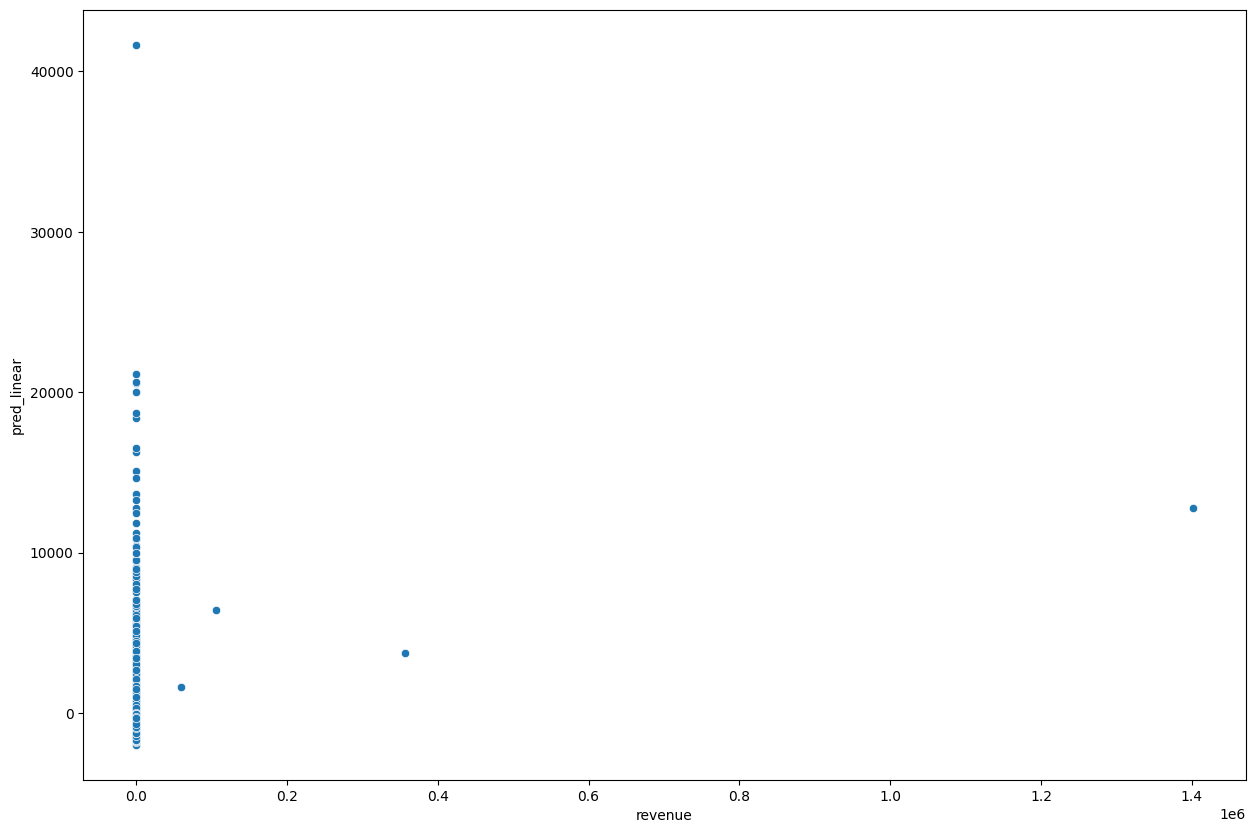

In [21]:
sns.scatterplot(data=y_train,
                x = 'revenue',
                y = 'pred_linear')

<Axes: xlabel='revenue', ylabel='pred_tree'>

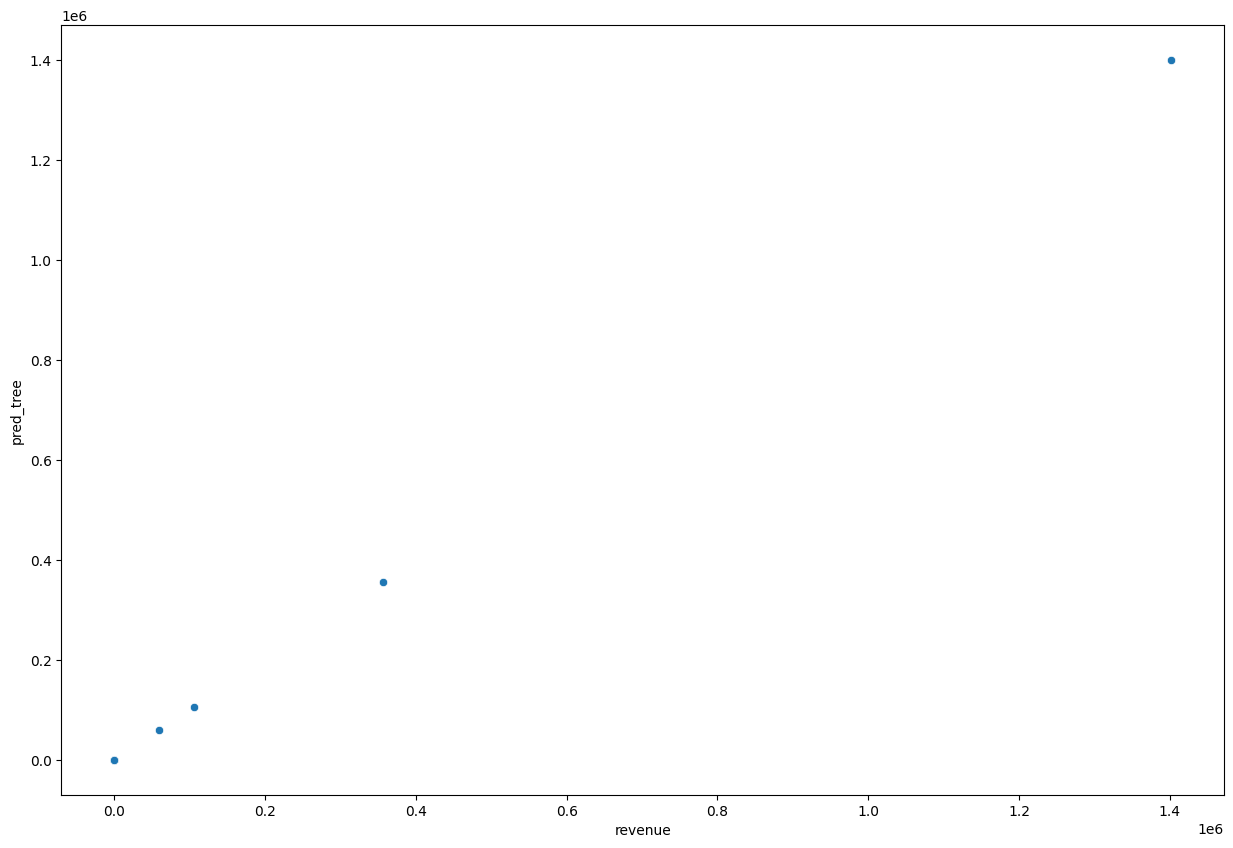

In [22]:
sns.scatterplot(data=y_train,
                x = 'revenue',
                y = 'pred_tree')

MAE(Mean Absolute Error)
*   정의 : 오차 절대값의 평균
*   단위 : 예측값의 단위와 동일(의미 해석이 직관적임)
*   의미 : 예측값이 실제값과 벗어나는 정도의 평균
*   값이 작을수록 예측이 정확. 즉, 모델의 성능이 좋음
*   예) MAE가 10,000원이면, 모델의 예측결과가 실제값으로부터 평균적으로 만원정도 벗어난다고 해석

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
mean_absolute_error(y_train.revenue, y_train.pred_linear)

470.98506035059887

In [25]:
mean_absolute_error(y_train.revenue, y_train.pred_tree)

0.0

MAPE(Median Absolute Percentage Error)
*   정의 : 퍼센티지 에러 절대값의 중위값
*   단위 : 퍼센트(%)
    *   서로 다른 예측모델의 성능을 비교할 수 있어, 범용적인 장점이 있음
*   의미 : 예측 오차율의 중간값
*   값이 작을수록 예측이 정확함. 즉, 모델 성능이 좋음
*   예)MAPE가 10%이면, 모델이 예측한 결과들 중 절반은 오차율이 10% 안쪽임

In [26]:
import numpy as np
# define mape
def mape(actual, pred):
    mape = (np.abs(pred - actual)/ actual).median() *100
    return mape

In [27]:
mape(y_train.revenue, y_train.pred_linear)

inf

In [28]:
mape(y_train.revenue, y_train.pred_tree)

0.0

Error 히스토그램
*   목적 : 예측값의 에러 분포를 확인

In [29]:
y_train['error_linear'] = np.abs(y_train['pred_linear'] - y_train['revenue'])
y_train['error_tree'] = np.abs(y_train['pred_tree'] - y_train['revenue'])

In [30]:
y_train.error_linear.describe()

count    3.028700e+04
mean     4.709851e+02
std      8.285923e+03
min      6.210973e-03
25%      1.153840e+02
50%      2.669610e+02
75%      4.904514e+02
max      1.388754e+06
Name: error_linear, dtype: float64

In [31]:
y_train.error_tree.describe()

count    30287.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: error_tree, dtype: float64

In [32]:
y_train['error_linear'] = np.log10(y_train['error_linear'])
y_train['error_tree'] = np.log10(y_train['error_tree'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


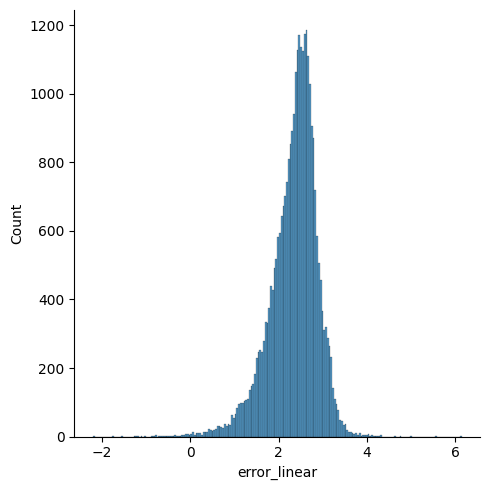

In [33]:
sns.displot(data = y_train, x = 'error_linear')

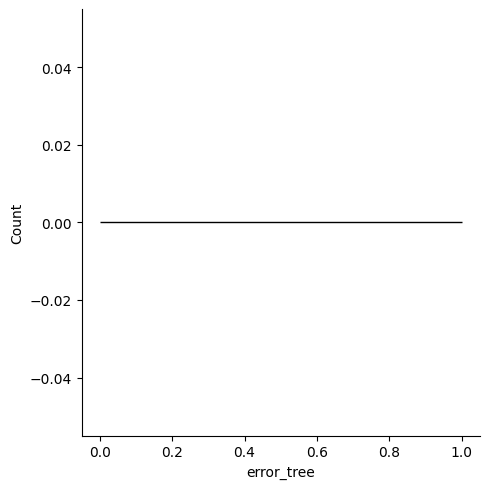

In [34]:
sns.displot(data = y_train, x = 'error_tree')

모델 해석 : 선형 회귀

회귀계수 시각화

In [35]:
model_linear.coef_

array([[ 3.83903863e+01, -3.05833868e-01,  1.16559630e+01,
         3.03453404e-03, -3.23446970e+02,  3.28816636e-03,
        -8.72456343e-01,  1.35094910e+01,  4.53464649e+01,
        -7.68783535e+01,  2.12568252e+01, -1.69169063e+00,
         2.07369829e+01, -9.96894899e+01, -1.32004171e+00,
         9.26807417e-07, -1.32476149e+00,  2.28762665e-03,
         5.61188730e+00, -4.90319909e+00,  6.98191749e-01,
         5.75950776e+01, -1.37926064e+01, -1.28227306e+01,
         5.49217680e+00, -1.52181468e+00, -4.94069579e+00,
         1.31700712e+00, -4.19623036e+02, -8.55408827e+01,
         2.26622702e+00, -1.19000898e+00,  1.71963986e+02,
        -4.37980174e+00, -1.39047614e+03,  1.63606498e+02,
         3.05219647e+02, -1.33819847e+02, -1.29492030e-02,
        -3.93939508e-02,  2.76577935e-03,  2.12634180e+00,
         1.46132815e+00, -2.62494726e+00, -1.19896868e+02,
        -1.03553622e+02,  2.50472235e+02, -2.70217460e+01,
        -5.13381519e+02, -4.33586418e+02, -4.11252305e+0

In [36]:
model_linear.intercept_ #선형 회귀 모델 상수값

array([17538.77225723])

In [ ]:
# coef_df = pd.DataFrame(model_linear.coef_, columns = X_train.columns).T.reset_index()

# coef_df

In [37]:
# Change the columns argument to match the shape of the coef_ matrix
coef_df = pd.DataFrame(model_linear.coef_, columns = X_train.columns).T.reset_index()
coef_df.columns = ['features', 'coef']
coef_df

,features,coef
0,accommodates,3.839039e+01
1,availability_365,-3.058339e-01
2,calculated_host_listings_count,1.165596e+01
3,minimum_maximum_nights,3.034534e-03
4,latitude,-3.234470e+02
5,number_of_reviews,3.288166e-03
6,maximum_minimum_nights,-8.724563e-01
7,review_scores_value,1.350949e+01
8,review_scores_accuracy,4.534646e+01
9,review_scores_location,-7.687835e+01


In [44]:
coef_df = coef_df.sort_values('coef', ascending= False) #내림차순 정렬
coef_df

,features,coef
36,has_availability,3.052196e+02
46,room_private,2.504722e+02
32,beds,1.719640e+02
35,host_identity_verified,1.636065e+02
21,review_scores_communication,5.759508e+01
8,review_scores_accuracy,4.534646e+01
0,accommodates,3.839039e+01
10,review_scores_checkin,2.125683e+01
12,reviews_per_month,2.073698e+01
7,review_scores_value,1.350949e+01


In [47]:
# sns.barplot(data = coef_df,
#             x = 'index',
#             y = 0)

# plt.xticks(rotation = 90)
# plt.show()

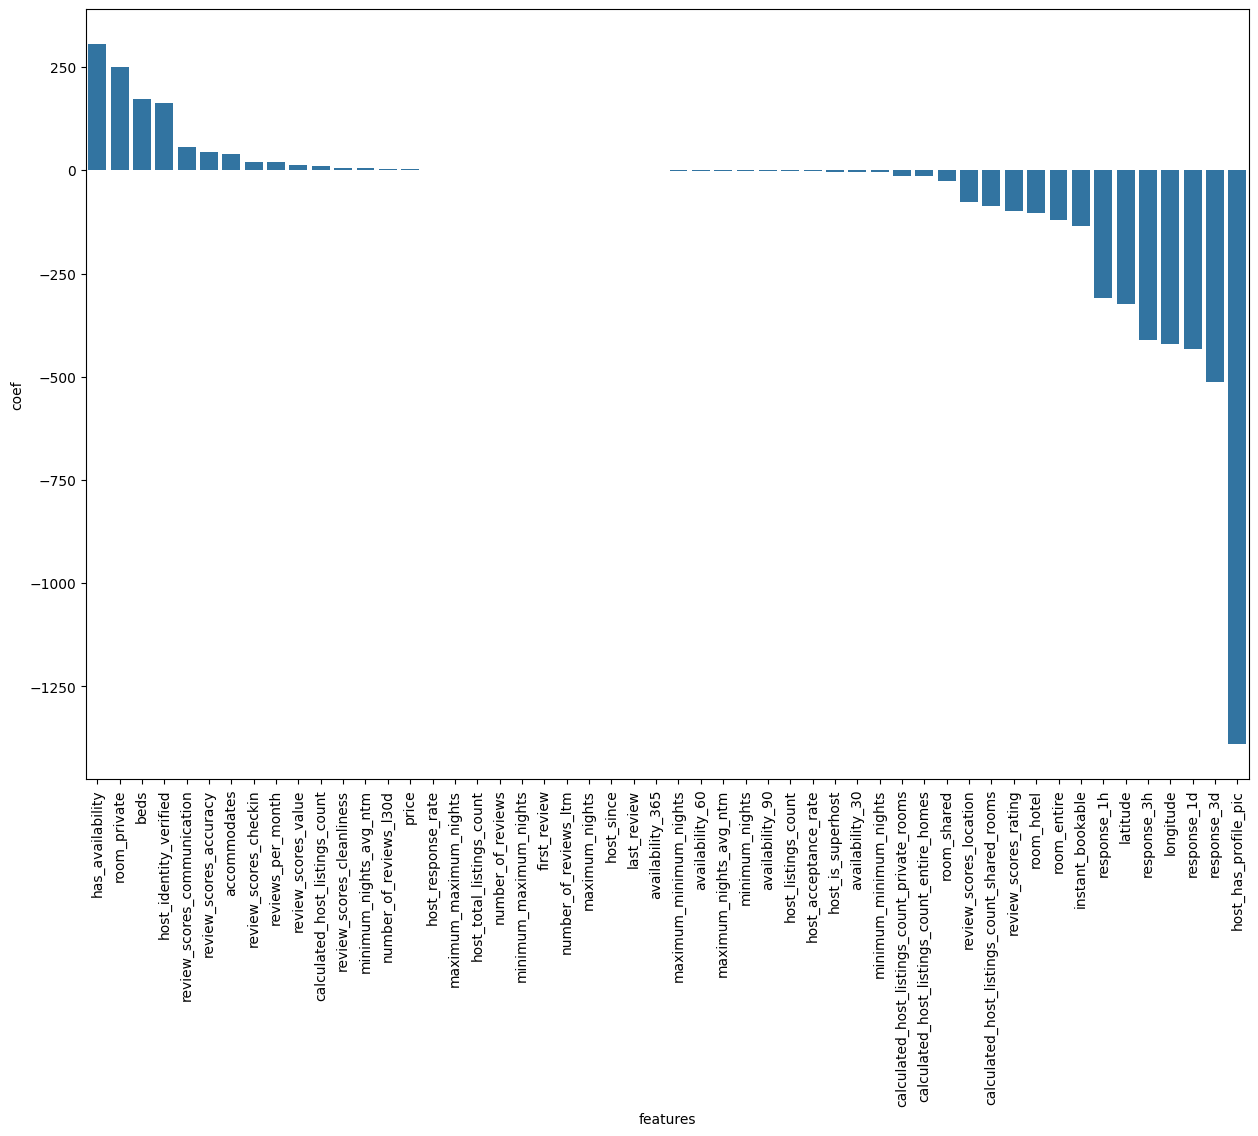

In [48]:
sns.barplot(data = coef_df,
            x = 'features',
            y = 'coef')

plt.xticks(rotation = 90)
plt.show()

모델 해석 : 의사결정나무

트리 시각화

In [49]:
from sklearn.tree import plot_tree

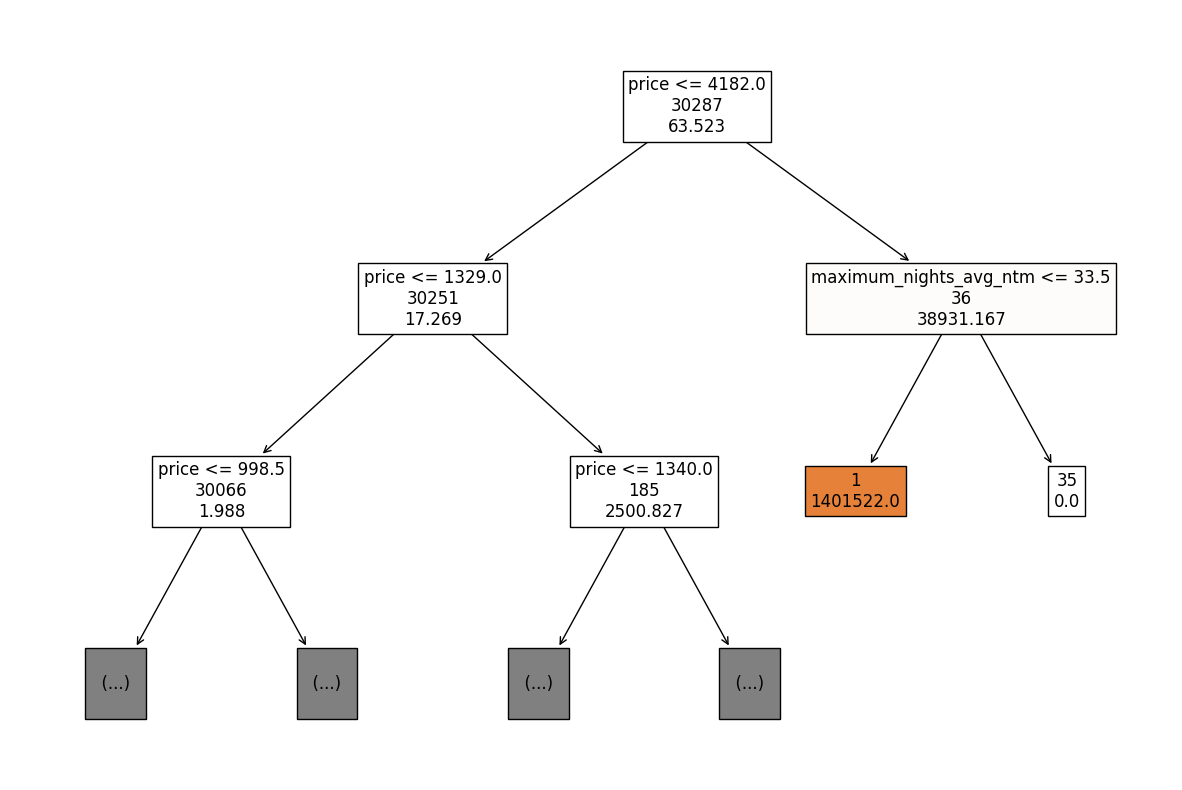

In [52]:
plot_tree(model_tree,
          feature_names = X_train.columns,
          filled = True,
          label = 'none', impurity = None,
          max_depth = 2,
          fontsize = 12)

plt.show()

Feature Importance

In [54]:
fi_df = pd.DataFrame([model_tree.feature_importances_], columns = X_train.columns).T.reset_index()
fi_df = fi_df.sort_values(0, ascending=False)

fi_df.head()

,index,0
14,maximum_nights_avg_ntm,0.906812
41,price,0.086334
11,host_listings_count,0.004962
10,review_scores_checkin,0.001507
28,longitude,0.000384


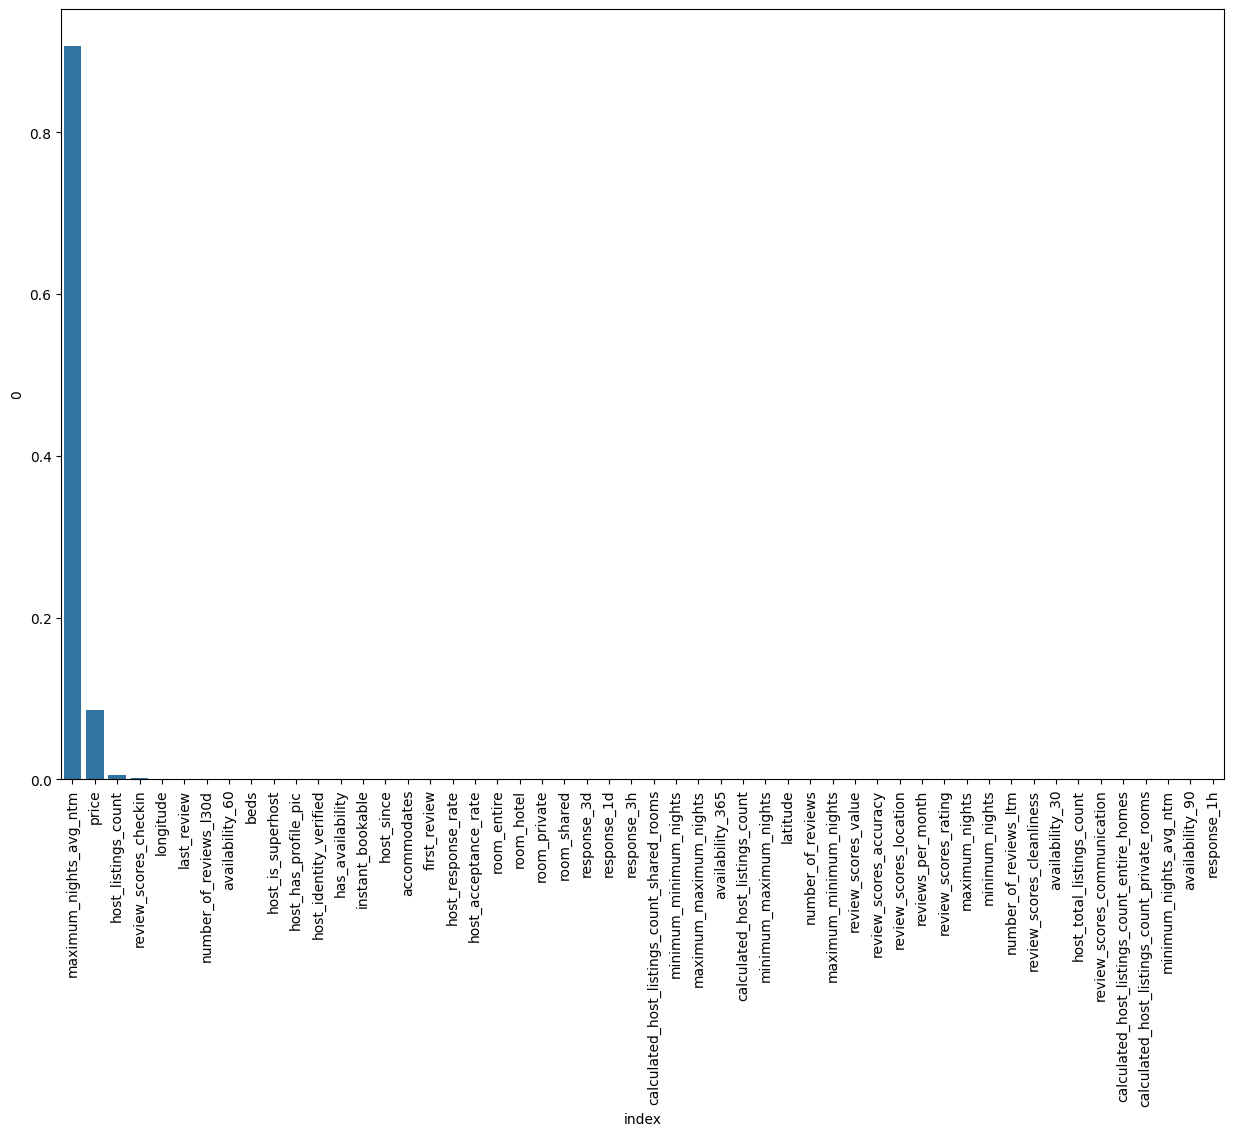

In [56]:
sns.barplot(data = fi_df,
            x = 'index',
            y = 0)

plt.xticks(rotation = 90)
plt.show()

모델 저장

In [57]:
import joblib

In [58]:
path_model = 'drive/MyDrive/letuin/airbnb/model'

In [59]:
# linear model
joblib.dump(model_linear, f'{path_model}/model_linear.pkl')

['drive/MyDrive/letuin/airbnb/model/model_linear.pkl']

In [60]:
# tree model
joblib.dump(model_tree, f'{path_model}/model_tree.pkl')

['drive/MyDrive/letuin/airbnb/model/model_tree.pkl']